In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt

In [37]:
df = yf.download ('AAPL', start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [38]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.983662,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745995,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048862,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388376,160423600
...,...,...,...,...,...,...
2021-11-03,150.389999,151.970001,149.820007,151.490005,151.269241,54511500
2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600
2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600


In [39]:
df ['MA50'] = df [ 'Adj Close'].rolling(50).mean()
df ['MA200'] = df [ 'Adj Close'].rolling(200).mean()

In [40]:
df

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.983662,165613600,NaN,NaN
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745995,212818400,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048862,257142000,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051125,263188400,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388376,160423600,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-03,150.389999,151.970001,149.820007,151.490005,151.269241,54511500,147.208954,136.411972
2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600,147.260879,136.485516
2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600,147.339979,136.550826


In [41]:
df = df.dropna()

In [42]:
df = df[['Adj Close', 'MA50', 'MA200']]

In [43]:
df

,Adj Close,MA50,MA200
Date,,,
2015-10-15,25.640274,25.770793,27.651220
2015-10-16,25.452320,25.752043,27.653563
2015-10-19,25.610479,25.734668,27.657886
2015-10-20,26.078083,25.707391,27.668032
2015-10-21,26.075796,25.708629,27.678155
...,...,...,...
2021-11-03,151.269241,147.208954,136.411972
2021-11-04,150.740005,147.260879,136.485516
2021-11-05,151.279999,147.339979,136.550826


In [44]:
Buy = [] 
Sell = []

for i in range (len (df)):
    if df.MA50.iloc [i]> df.MA200.iloc[i] \
    and df.MA50.iloc [i-1] < df.MA200.iloc [i-1]:
        Buy.append (i)
    elif df.MA50.iloc[i]<df.MA200.iloc[i] \
    and df.MA50.iloc [i-1]> df.MA200.iloc [i-1]:
        Sell.append (i)

In [45]:
Buy

[220, 893]

In [46]:
Sell

[0, 802]

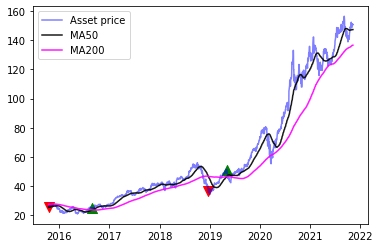

In [47]:
plt.plot(df['Adj Close'], label= 'Asset price', c='blue', alpha=0.5)
plt.plot(df['MA50'], label='MA50', c= 'k', alpha = 0.9)
plt.plot(df['MA200'], label='MA200', c='magenta', alpha = 0.9)
plt.scatter(df.iloc [Buy].index,df.iloc [Buy] ['Adj Close'],marker='^', color='g', s=100)
plt.scatter(df.iloc [Sell].index,df.iloc [Sell] ['Adj Close'],marker='v', color='r', s=100)
plt.legend()
plt.show()